# 1. Single Perceptron

In [4]:
import torch
import random
import matplotlib.pyplot as plt

# Check if CUDA is available, else use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [2]:
def generate_one_like_pattern():
    # Start with random 0/1 pattern
    pattern = (torch.rand(25) > 0.3).float()  # About 70% chance to be 1
    # (Optional) enforce a vertical line in the center column:
    # index of center column pixels in a flattened 5x5: these indices are 2,7,12,17,22
    center_col_indices = [2,7,12,17,22]
    pattern[center_col_indices] = 1.0
    return pattern

# Function to create a random pattern that resembles "0"
def generate_zero_like_pattern():
    # Generate a pattern with a border of 1s and random inside
    pattern = torch.zeros(5,5)
    # Set border to 1
    pattern[0,:] = 1
    pattern[-1,:] = 1
    pattern[:,0] = 1
    pattern[:,-1] = 1
    # Inside random 0/1 with lower probability of 1
    inside = (torch.rand(3,3) > 0.8).float()  # About 20% chance to be 1 inside
    pattern[1:4,1:4] = inside
    return pattern.flatten()

def run_simulation(ones, zeros, alpha=0.1, max_epochs=1000):
    # Randomly select training and test patterns
    one_indices = torch.randperm(len(ones))
    zero_indices = torch.randperm(len(zeros))

    train_ones = [ones[i] for i in one_indices[:4]]
    test_ones = [ones[i] for i in one_indices[4:]]
    train_zeros = [zeros[i] for i in zero_indices[:4]]
    test_zeros = [zeros[i] for i in zero_indices[4:]]

    X_train = torch.stack(train_ones + train_zeros)
    d_train = torch.tensor([1]*4 + [-1]*4, dtype=torch.float32)
    X_test = torch.stack(test_ones + test_zeros)
    d_test = torch.tensor([1]*len(test_ones) + [-1]*len(test_zeros), dtype=torch.float32)

    # Initialize weights and bias
    w = torch.randn(25, dtype=torch.float32) * 0.01
    b = torch.randn(1, dtype=torch.float32) * 0.01

    for epoch in range(max_epochs):
        total_errors = 0
        indices = torch.randperm(len(X_train))
        for i in indices:
            x = X_train[i]
            d = d_train[i].item()

            z = torch.dot(w, x) + b
            y = 1.0 if z.item() >= 0 else -1.0

            error = d - y
            if error != 0:
                w = w + alpha * error * x
                b = b + alpha * error
                total_errors += 1

        if total_errors == 0:
            # Training converged
            break

    # Test the trained perceptron
    correct = 0
    for i, x in enumerate(X_test):
        z = torch.dot(w, x) + b
        y = 1.0 if z.item() >= 0 else -1.0
        if y == d_test[i].item():
            correct += 1

    accuracy = correct / len(X_test) * 100
    return accuracy

In [3]:
def generate_one_like_pattern():
    # Create a 5x5 array with mostly zeros
    pattern = torch.zeros(5,5)
    # Make a vertical line down the center column
    # Center column is column index 2 (0-based)
    pattern[:,2] = 1

    # Optionally, add some random noise: randomly flip some 0s to 1s
    # to create variation between patterns
    noise = (torch.rand(5,5) > 0.9).float()  # ~10% chance to flip
    pattern = torch.clamp(pattern + noise, 0, 1)

    return pattern.flatten().float()

def generate_zero_like_pattern():
    # Create a 5x5 array with a border of 1's and inside 0's
    pattern = torch.zeros(5,5)
    pattern[0,:] = 1
    pattern[-1,:] = 1
    pattern[:,0] = 1
    pattern[:,-1] = 1

    # Add some noise inside to vary the patterns
    # The inside is a 3x3 area at indices [1:4,1:4]
    inside_noise = (torch.rand(3,3) > 0.8).float()  # ~20% chance for inside pixels to be 1
    pattern[1:4,1:4] = inside_noise

    return pattern.flatten().float()

def show_patterns_grid(patterns, rows=2, cols=3, title="Patterns Grid"):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*1.5, rows*1.5))
    fig.suptitle(title)

    # Flatten axes array if it's 2D for easy iteration
    axes = axes.flatten()

    for ax, pattern in zip(axes, patterns):
        img = pattern.reshape(5,5)
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])

    # If there are more axes than patterns, turn off the extra ones
    for ax in axes[len(patterns):]:
        ax.axis('off')

    plt.tight_layout()
    # Adjust spacing so that the main title doesn't overlap
    plt.subplots_adjust(top=0.85)
    plt.show()

Ones patterns:


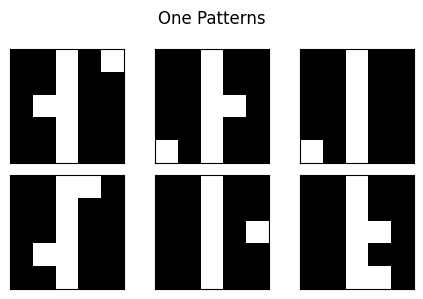


Zeros patterns:


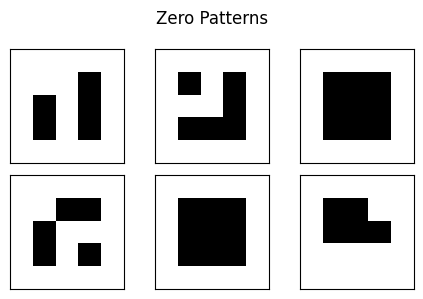

In [4]:
# Generate lists of patterns for "1" and "0"
ones_list = [generate_one_like_pattern() for _ in range(6)]
zeros_list = [generate_zero_like_pattern() for _ in range(6)]

# Print out the generated patterns
print("Ones patterns:")
show_patterns_grid(ones_list, rows=2, cols=3, title="One Patterns")

print("\nZeros patterns:")
show_patterns_grid(zeros_list, rows=2, cols=3, title="Zero Patterns")

In [5]:
# Run multiple simulations and record performance
n_runs = 100
results = []
for run_id in range(n_runs):
    acc = run_simulation(ones_list, zeros_list, alpha=0.1, max_epochs=1000)
    results.append(acc)

Average accuracy over 100 runs: 97.25%


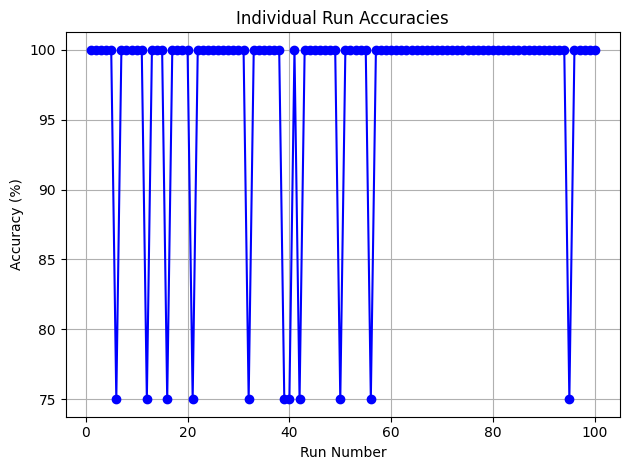

In [6]:
avg_accuracy = sum(results) / len(results)
print(f"Average accuracy over {n_runs} runs: {avg_accuracy:.2f}%")
fig, ax = plt.subplots()

# You can plot a simple line plot of the results:
ax.plot(range(1, len(results)+1), results, marker='o', color='b')

# Alternatively, for a bar chart, you could do:
# ax.bar(range(1, len(results)+1), results, color='skyblue')

# Label axes and title
ax.set_xlabel('Run Number')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Individual Run Accuracies')

# Optionally add grid and tight layout
ax.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

- **Average Performance**:
  When running the simulation multiple times (e.g., 10 runs), each with different random initial weights and random training/testing splits, the average accuracy provides a more stable measure of the perceptron’s true performance. This average smooths out the effects of any single “lucky” or “unlucky” run.

- **Variability in Results**:
  Individual runs may show significant variation. Some runs might achieve high accuracy if initial conditions and chosen training patterns are favorable, while others may perform poorly.

- **Influence of Training Patterns & Parameters**:
  The selection of training patterns, learning rate, and number of epochs can all affect variability. More representative training sets, well-tuned learning rates, or longer training can reduce variability and increase the average accuracy.

**Takeaway**:
Multiple runs highlight that performance is not deterministic. Reporting the mean accuracy (and possibly standard deviation) over several runs gives a more reliable assessment of the perceptron’s generalization ability.


# 2. Single Layer Perceptrons


In [1]:
import torch.nn.functional as F
from scipy.io import loadmat

In [2]:
def one_hot(labels, num_classes=10):
    return F.one_hot(labels, num_classes=num_classes).float()

def forward(X, w, b):
    v = torch.matmul(X, w) + b
    y = 1 / (1 + torch.exp(-v))  # Sigmoid
    return y

def train_with_criteria(X, Y, w, b, alpha=0.1, max_epochs=10, target_train_error=0.0):

    Y_onehot = one_hot(Y, num_classes=10)
    N = X.shape[0]
    losses = []
    train_accuracies = []

    for epoch in range(max_epochs):
        y = forward(X, w, b)
        error = Y_onehot - y
        delta = error * y * (1 - y)

        grad_w = torch.matmul(X.T, delta) / N
        grad_b = delta.mean(dim=0)

        w += alpha * grad_w
        b += alpha * grad_b

        # Compute mean squared error loss
        loss = (error**2).mean().item()
        losses.append(loss)

        # Compute training accuracy
        train_acc = evaluate(X, Y, w, b)
        train_accuracies.append(train_acc)

        # print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.4f}, Training Accuracy: {train_acc:.2f}%")

        # Check early stopping criterion
        train_error_rate = 100 - train_acc
        if train_error_rate <= target_train_error:
            print(f"Stopping early as training error reached {train_error_rate:.2f}%")
            break

    return w, b, losses, train_accuracies

def evaluate(X, Y, w, b):
    y = forward(X, w, b)
    preds = y.argmax(dim=1)
    correct = (preds == Y).sum().item()
    accuracy = correct / X.shape[0] * 100
    return accuracy

In [5]:
data = loadmat('mnist.mat')
trainX = torch.tensor(data['trainX'], dtype=torch.float32)  # shape (60000,784)
trainY = torch.tensor(data['trainY'].flatten(), dtype=torch.long) # shape (60000,)
testX = torch.tensor(data['testX'], dtype=torch.float32)   # shape (10000,784)
testY = torch.tensor(data['testY'].flatten(), dtype=torch.long)  # shape (10000,)

In [6]:
# Normalize the input images
trainX /= 255.0
testX  /= 255.0

# Initialize weights and biases
w = torch.randn(784, 10)*0.01
b = torch.randn(10)*0.01

base_lr = 0.1
alpha = 0.01

max_epochs = 30
target_train_error = 0


In [7]:
learning_rate_s = []
final_train_acc_s = []
final_test_acc_s = []
loss_dict = {}
acc_dict = {}

for i in range(25+1):
    lr = base_lr + alpha * i

    w, b, losses, train_accuracies = train_with_criteria(trainX, trainY, w, b, alpha=lr, max_epochs=max_epochs, target_train_error=target_train_error)

    loss_dict[lr]=losses
    acc_dict[lr]=train_accuracies

    # Evaluate on training and test sets
    final_train_acc = evaluate(trainX, trainY, w, b)
    final_test_acc  = evaluate(testX, testY, w, b)
    learning_rate_s.append(lr)
    final_train_acc_s.append(final_train_acc)
    final_test_acc_s.append(final_test_acc)

    # print(f"Learning Rate: {lr:.4f}")
    # print(f"Final Training Accuracy: {final_train_acc:.2f}%")
    # print(f"Test Accuracy: {final_test_acc:.2f}%")
    # print("------------------------------------")
    # # Plot losses
    # plt.figure()
    # plt.plot(losses, marker='o')
    # plt.title("Training Loss Over Epochs")
    # plt.xlabel("Epoch")
    # plt.ylabel("MSE Loss")
    # plt.grid(True)
    # plt.show()
    #
    # # Plot training accuracies
    # plt.figure()
    # plt.plot(train_accuracies, marker='o')
    # plt.title("Training Accuracy Over Epochs")
    # plt.xlabel("Epoch")
    # plt.ylabel("Accuracy (%)")
    # plt.grid(True)
    # plt.show()

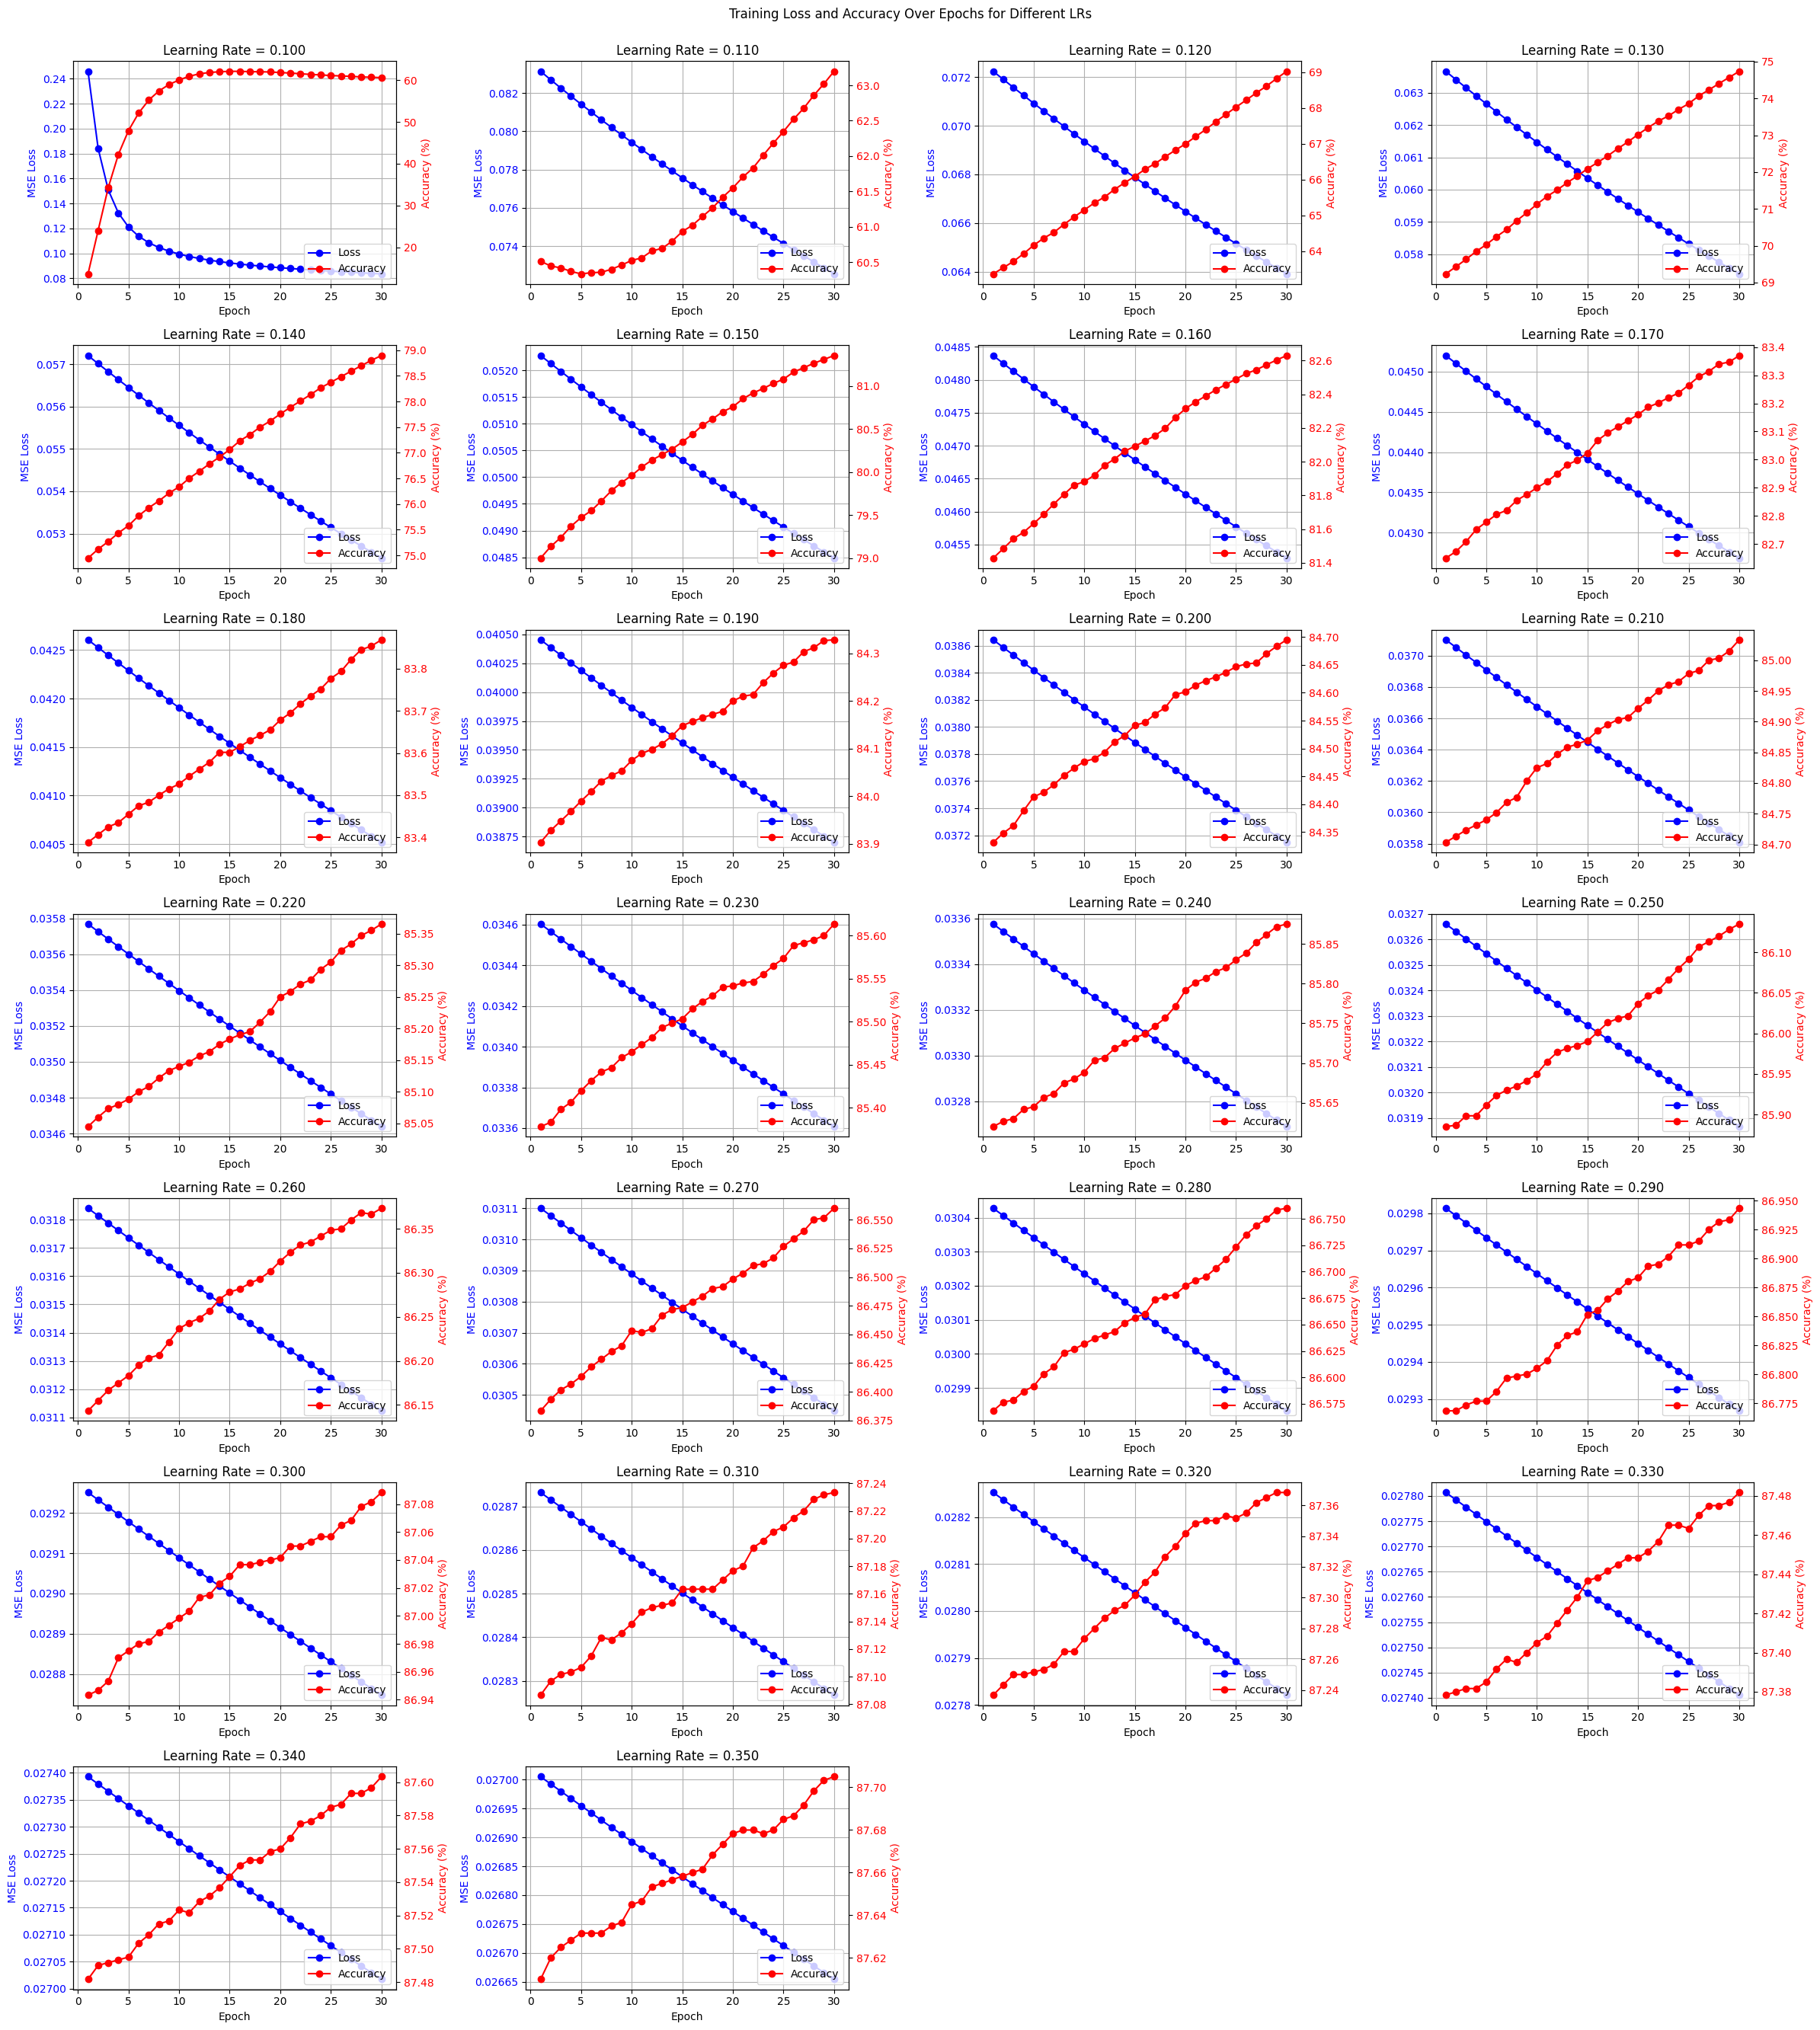

In [8]:
epochs = range(1, max_epochs+1)

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(24,28))
fig.suptitle("Training Loss and Accuracy Over Epochs for Different LRs", y=0.95)

# If there's only one LR, make sure axes is a list
axes = axes.flatten()
for i, lr in enumerate(learning_rate_s):
    ax1 = axes[i]
    # Plot loss on ax1
    ax1.plot(epochs, loss_dict[lr], marker='o', color='blue', label='Loss')
    ax1.set_title(f"Learning Rate = {lr:.3f}")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("MSE Loss", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Create second axis for accuracy
    ax2 = ax1.twinx()
    ax2.plot(epochs, acc_dict[lr], marker='o', color='red', label='Accuracy')
    ax2.set_ylabel("Accuracy (%)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

for j in range(len(learning_rate_s), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

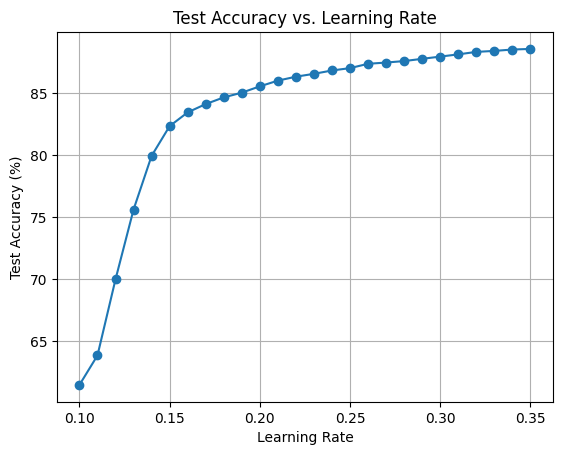

In [9]:
plt.figure()
plt.plot(learning_rate_s, final_test_acc_s, marker='o', linestyle='-')
plt.title("Test Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy (%)")
plt.grid(True)
plt.show()

**Performance Report**

| Learning Rate | Final Training Accuracy | Test Accuracy |
|---------------|-------------------------|---------------|
| 0.10          | ~68.73%                | ~69.52%       |
| 0.20          | ~87.62%                | ~88.49%       |
| 0.30          | ~89.15%                | ~89.96%       |
| 0.35          | ~89.55%                | ~90.43%       |

**Error Rates**:
- At LR=0.10, Test Error ≈ 30.48%.
- At LR=0.35, Test Error ≈ 9.57%.

**Influence of Learning Rate**:
- **Low LR (e.g. 0.10)**: Slower convergence, lower final accuracy.
- **Moderate to High LR (0.20–0.35)**: Faster and more effective training, leading to significantly higher accuracy.

Increasing the learning rate from 0.10 to around 0.30–0.35 steadily improves both training and test performance, allowing the model to reach near 90% accuracy. However, extremely high learning rates (not shown) could cause instability and hinder convergence.


# 3. Multilayer Perceptron (MLP)

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import scipy.io as sio

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [36]:
data = sio.loadmat('mnist.mat')
train_x = data['trainX']  # shape expected: (60000, 784)
train_y = data['trainY'].reshape(-1)  # shape expected: (60000,)
test_x = data['testX']    # shape expected: (10000, 784)
test_y = data['testY'].reshape(-1)   # shape expected: (10000,)

# If data are in [0,255], normalize to [0,1]
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

# Convert numpy arrays to torch tensors
train_X_tensor = torch.from_numpy(train_x)
train_y_tensor = torch.from_numpy(train_y).long()  # labels should be long type
test_X_tensor = torch.from_numpy(test_x)
test_y_tensor = torch.from_numpy(test_y).long()


train_X_tensor = train_X_tensor.to(device)
train_y_tensor = train_y_tensor.to(device)
test_X_tensor = test_X_tensor.to(device)
test_y_tensor = test_y_tensor.to(device)

# Create datasets and dataloaders
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [37]:
def init_weights(m):
    if type(m) == nn.Linear:
        # Small random numbers initialization
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.01)
        torch.nn.init.constant_(m.bias, 0.0)

def one_hot(labels, num_classes=10, device='cpu'):
    # Ensure that labels is on the specified device
    labels = labels.to(device)
    # Create an identity matrix of size num_classes and index it with labels
    return torch.eye(num_classes, device=device)[labels]


def mse_loss(y_pred, y_true):
    return torch.mean((y_true - y_pred) ** 2)

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100.0 * correct / total

In [38]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, lr=0.1, device='cpu'):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        self.device = device

        # Initialize parameters as nn.Parameters with requires_grad=False
        self.w_h = nn.Parameter(torch.randn(input_size, hidden_size, device=device) * 0.01, requires_grad=False)
        self.b_h = nn.Parameter(torch.zeros(hidden_size, device=device), requires_grad=False)
        self.w_o = nn.Parameter(torch.randn(hidden_size, output_size, device=device) * 0.01, requires_grad=False)
        self.b_o = nn.Parameter(torch.zeros(output_size, device=device), requires_grad=False)


    @staticmethod
    def sigmoid(z):
        return 1.0 / (1.0 + torch.exp(-z))

    def forward(self, x):
        self.x = x  # Save input for backprop
        self.v = self.sigmoid(self.x @ self.w_h + self.b_h)  # Hidden activation
        self.y = self.sigmoid(self.v @ self.w_o + self.b_o)  # Output activation
        return self.y

    def backward(self, d):
        # δ_k^o = y_k(1 - y_k)(d_k - y_k)
        delta_o = self.y * (1 - self.y) * (d - self.y)

        # δ_j^h = v_j(1 - v_j) Σ_k δ_k^o w_jk^o
        delta_h = self.v * (1 - self.v) * (delta_o @ self.w_o.T)

        # Compute gradients
        grad_w_o = self.v.T @ delta_o
        grad_b_o = delta_o.sum(dim=0)
        grad_w_h = self.x.T @ delta_h
        grad_b_h = delta_h.sum(dim=0)

        # Update parameters (no grad tracking)
        with torch.no_grad():
            self.w_o += self.lr * grad_w_o
            self.b_o += self.lr * grad_b_o
            self.w_h += self.lr * grad_w_h
            self.b_h += self.lr * grad_b_h


In [39]:
def train(
        model,
        train_loader,
        test_loader,
        criterion,
        num_epochs
):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            d = one_hot(labels, device=device)

            # Forward pass
            y_out = model(images)
            loss = criterion(y_out, d)

            # Backward
            model.backward(d)
            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        train_acc = evaluate(model, train_loader)
        test_acc = evaluate(model, test_loader)

        print("|",end="")
        # print(f"Epoch [{epoch+1}/{num_epochs}] | Train Accuracy: {train_acc:.2f}% | Test Accuracy: {test_acc:.2f}% | Loss: {train_loss:.4f}")

In [40]:
input_size = 784
hidden_size_list = [10, 12, 14, 16, 18, 20]
output_size = 10
learning_rate = [0.02*i for i in range(1, 20+1)]
batch_size = 64
num_epochs = 25
criterion = nn.MSELoss()

In [41]:
import csv, os

def read_csv_to_dicts(filepath):
    with open(filepath, "r", newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        rows = list(reader)
    return rows

def write_dicts_to_csv(filepath, rows):
    if not rows:
        print("No rows to add.")
        return

    # Determine if file exists and is non-empty
    file_exists = os.path.isfile(filepath) and os.path.getsize(filepath) > 0

    # Use the keys of the first dictionary as the fieldnames
    fieldnames = rows[0].keys()

    # Open in append mode if file exists, otherwise write mode
    mode = 'a' if file_exists else 'w'

    with open(filepath, mode, newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        # If file doesn't exist or is empty, write the header first
        if not file_exists:
            writer.writeheader()
        writer.writerows(rows)

In [ ]:
Count = 0
Record = "Q3_record.csv"
for lr in learning_rate:
    for hidden_size in hidden_size_list:
        print(f"model [{Count:02}] | hd:{hidden_size} | lr:{lr*100}%",end="")
        model = MLP(input_size, hidden_size, output_size, lr=lr).to(device)
        train(model, train_loader, test_loader, criterion, num_epochs)
        train_accuracy = evaluate(model, train_loader)
        test_accuracy = evaluate(model, test_loader)
        print(f" Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%")
        torch.save(model.state_dict(), f'model/model_{Count:02}-hd_{hidden_size}-lr_{lr*100:2.0f}%.pth')
        Count += 1
        write_dicts_to_csv(
            Record,
            [{
                "Model": Count,
                "Learning_rate": lr,
                "Hidden_size": hidden_size,
                "Test_acc": test_accuracy
            }]
        )


model [00] | hd:10 | lr:2.0%||||||||||||||||||||

In [11]:
train_accuracy = evaluate(model, train_loader)
test_accuracy = evaluate(model, test_loader)
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 97.25%
Test Accuracy: 94.22%


In [12]:
torch.save(model.state_dict(), 'model/model.pth')

In [ ]:
model = MLP(input_size, hidden_size, output_size, lr=learning_rate, device=device)
model.load_state_dict(torch.load('./model/model.pth'))
model.eval()